In [1]:
#import necessasary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_card_clean.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## 3. Data Understanding

### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

In [3]:
df.shape

(30000, 25)

In [4]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

### Data preparation

In [6]:
del df['ID']

In [7]:
df_2 = df.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_2['SEX'] = le.fit_transform(df_2['SEX'])
df_2['EDUCATION'] = le.fit_transform(df_2['EDUCATION'])
df_2['MARRIAGE'] = le.fit_transform(df_2['MARRIAGE'])
df_2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Model building

In [9]:
X = df_2.drop(labels='DEFAULT',axis = 1)
y = df_2['DEFAULT']

In [10]:
X.shape

(30000, 23)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=12, stratify=y)

In [12]:
X_train.shape,X_test.shape

((24000, 23), (6000, 23))

### Model training

In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

import xgboost as xgb
import lightgbm as lgbm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [14]:
rf_classifier = RandomForestClassifier()
gb_classifiier = GradientBoostingClassifier()
adb_calassifer = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier= LGBMClassifier()

In [15]:
%%time
rf_classifier.fit(X_train,y_train)

CPU times: user 7.19 s, sys: 31.8 ms, total: 7.22 s
Wall time: 7.34 s


RandomForestClassifier()

In [16]:
%%time
gb_classifiier.fit(X_train,y_train)

CPU times: user 10.4 s, sys: 32.2 ms, total: 10.4 s
Wall time: 10.6 s


GradientBoostingClassifier()

In [17]:
%%time
adb_calassifer.fit(X_train,y_train)

CPU times: user 2.3 s, sys: 15.7 ms, total: 2.32 s
Wall time: 2.35 s


AdaBoostClassifier()

In [18]:
%%time
xgb_classifier.fit(X_train,y_train)

[16:42:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 15.4 s, sys: 328 ms, total: 15.8 s
Wall time: 4.62 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
%%time
lgbm_classifier.fit(X_train,y_train)

CPU times: user 1.96 s, sys: 66.8 ms, total: 2.03 s
Wall time: 612 ms


LGBMClassifier()

### 7 Model testing

In [20]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_adb = adb_calassifer.predict(X_test)
y_pred_gb = gb_classifiier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_lgbm = lgbm_classifier.predict(X_test)

### Model evalueation

#### test data

In [21]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix

In [22]:
#random forest
accuracy_score(y_test,y_pred_rf)
precision_score(y_test, y_pred_rf)

0.66

### future importance

In [25]:
rf_f = rf_classifier.feature_importances_
adb_f = adb_calassifer.feature_importances_
gb_f = gb_classifiier.feature_importances_
xgb_f = xgb_classifier.feature_importances_
lgbm_f = lgbm_classifier.feature_importances_

In [29]:
df_3 = pd.DataFrame({
    'features' : X_train.columns,
    'rf' : rf_f,
    'adb' : adb_f,
    'xgbm' : xgb_f,
    'lgbm' : lgbm_f,
    'gb' : gb_f
})
df_3

,features,rf,adb,xgbm,lgbm,gb
0,LIMIT_BAL,0.058754,0.08,0.024132,215,0.032703
1,SEX,0.012335,0.02,0.017697,35,0.002271
2,EDUCATION,0.018225,0.00,0.020403,64,0.002574
3,MARRIAGE,0.012990,0.02,0.020488,36,0.004880
4,AGE,0.066808,0.00,0.017460,201,0.006101
5,PAY_1,0.097729,0.18,0.356028,103,0.630210
6,PAY_2,0.047368,0.06,0.117766,44,0.083212
7,PAY_3,0.021637,0.02,0.049169,50,0.032262
8,PAY_4,0.025280,0.02,0.041508,37,0.017999
9,PAY_5,0.021174,0.04,0.042685,37,0.015874


<AxesSubplot:xlabel='rf', ylabel='features'>

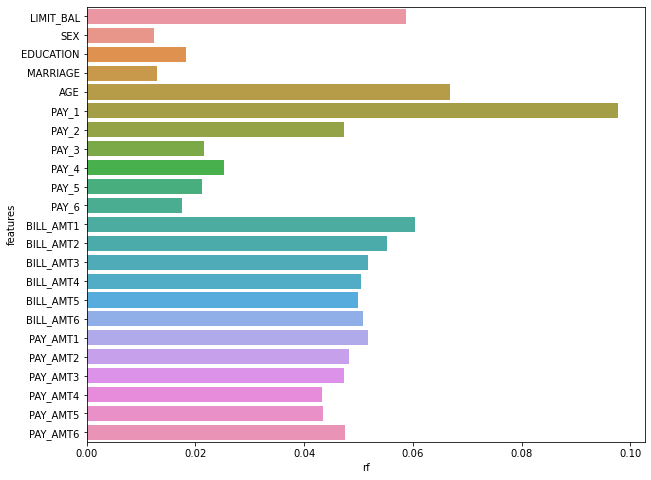

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'rf',y = 'features',data = df_3)